<a href="https://colab.research.google.com/github/peppefdf/CSL_Gipuzkoa/blob/main/Outliers_Detection_Mahalanobis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
removed!
        Fecha                 Hora   Sistema  \
0  2023-01-16  01:00:00 - 01:30:00  GI-20-10   
1  2023-01-16  02:00:00 - 02:30:00  GI-20-10   
2  2023-01-16  02:00:00 - 02:30:00  GI-20-10   
3  2023-01-16  02:30:00 - 03:00:00  GI-20-10   
4  2023-01-16  02:30:00 - 03:00:00  GI-20-10   

                                                 ETD                Detector  \
0  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...   Lento A GI-20 AÃORGA   
1  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...    Lento SAN SEBASTIÃN   
2  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...  Central SAN SEBASTIÃN   
3  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...   Lento A GI-20 AÃORGA   
4  [GI-20-10] 34-ETD SAN SEBASTIÃN-A GI-20 AÃOR...    Lento SAN SEBASTIÃN   

   0-50 (km/h)  50-80 (km/h)  80-120 (km/h)  120-255 (km/h)  \
0            1            12              4               0   
1            1             3   

<ipython-input-3-1c6b78ec70f5>:62: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_df_System.loc[:,'Hora_1']= pd.to_timedelta(data_df_System['Hora_1']).astype(int)
<ipython-input-3-1c6b78ec70f5>:63: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_df_System.loc[:,'Hora_2']= pd.to_timedelta(data_df_System['Hora_2']).astype(int)


Indices of outliers:
[19, 21, 23, 25, 28, 30, 56, 63, 65, 90, 91, 92, 134, 135, 138, 152, 161, 165, 168, 172, 174, 206, 208, 234, 242, 245, 277, 291, 293, 296, 306, 327, 328, 329, 330, 360, 365, 396, 399, 438, 439, 440, 441, 557, 560, 676, 678, 680, 778, 779, 815, 816, 819, 832, 853, 870, 888, 892, 893, 969, 984, 987, 1038, 1054, 1061, 1063, 1095, 1099, 1100, 1101, 1173, 1188, 1193, 1218, 1219, 1221, 1222, 1249, 1285, 1286, 1288, 1322, 1323, 1325, 1428, 1429, 1430, 1435, 1436, 1437, 1538, 1578, 1610, 1618, 1620, 1627, 1648, 1649, 1650, 1679, 1682, 1704, 1719, 1746, 1747, 1788, 1793, 1794, 1796, 1798, 1801, 1818, 1820, 1823, 1867, 1871, 1872, 1873, 1905, 1910, 1928, 1929, 1935, 1937, 1970, 1971, 1972, 1996, 1999, 2002, 2007, 2008, 2023, 2029, 2033, 2037, 2042, 2081, 2082, 2085, 2086, 2087, 2088, 2130, 2133, 2136, 2197, 2198, 2199, 2200, 2301, 2305, 2307, 2308, 2309, 2333, 2339, 2340, 2342, 2343, 2377, 2384, 2397, 2403, 2426, 2427, 2429, 2430, 2431, 2462, 2478, 2489, 2491, 2493, 2495, 24

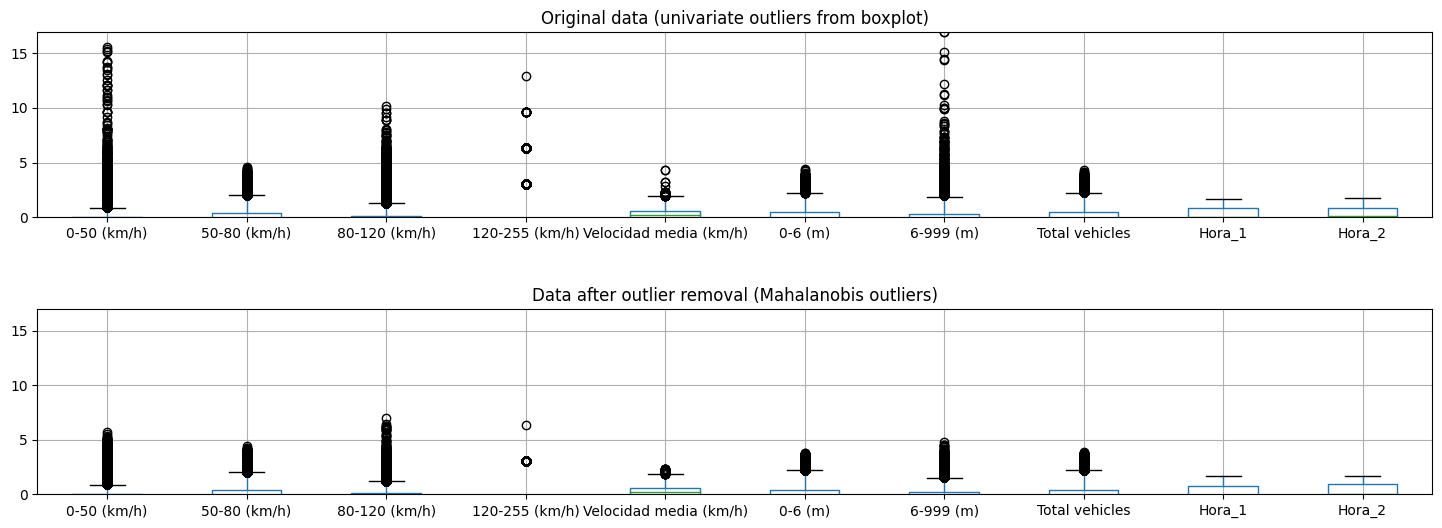

In [3]:
%reset

import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from google.colab import drive

#import scipy as stats
from scipy.stats import chi2

# calculate
# the Mahalanobis distance
def calculateMahalanobis(Data_df):
    #y_mu = y - np.mean(data)
    y_mu = (Data_df - Data_df.mean(axis=0)).values
    cov = np.cov(Data_df.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.zeros((np.shape(left)[0],np.shape(left)[0]))
    y_mu = y_mu.T
    mahal = np.dot(left, y_mu)
    return mahal.diagonal()

year = '2023'

# Import from the API all the CSV (;) files
filepath = '/content/drive/MyDrive/Colab Notebooks/CSL_GIPUZKOA/Proyecto Piloto_Eskuzaitzeta/DATOS_GIPUZKOA/TRAFICO/Speeds_data_file_' + str(int(year)) + '.csv'

file_len = 317733 # total length of the file

skip_rows = np.random.randint(file_len-1, size= file_len - 39000) # 39000 is the max file size we can read(?)
skip_rows = list(skip_rows)
try:
  skip_rows.remove(0) # keep the header row
  print('removed!')
except:
  print('not removed!')
  pass

#data_df = pd.read_csv(filepath, sep=",",  encoding='latin-1')
data_df = pd.read_csv(filepath, sep=",",  encoding='latin-1', skiprows=skip_rows, header=0)
print(data_df.head())
print('Sistemas:')
print(data_df['Sistema'].unique())
names = data_df.columns.tolist()
print('names')
print(names)

#data_df_System = data_df.loc[data_df['Sistema'] == 'A-15']
data_df_System = data_df.copy()

data_df_System[['Hora_1','Hora_2']] = data_df_System['Hora'].str.split('-',expand=True)
data_df_System.drop(['Fecha','Sistema', 'Hora', 'Detector', 'ETD', 'Unnamed: 13'], axis=1, inplace=True)
data_df_System.columns.values[-3] = "Total vehicles"

#data_df_System.loc[:,'Fecha']=pd.to_datetime(data_df_System['Fecha']).dt.strftime("%Y%m%d")
data_df_System.loc[:,'Hora_1']= pd.to_timedelta(data_df_System['Hora_1']).astype(int)
data_df_System.loc[:,'Hora_2']= pd.to_timedelta(data_df_System['Hora_2']).astype(int)

names = data_df_System.columns.tolist()
print('names')
print(names)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(data_df_System.to_numpy())
data_df_System = pd.DataFrame(df_scaled, columns=names)

data_df_Mahalanobis = data_df_System.copy()

# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
data_df_Mahalanobis['Mahalanobis'] = calculateMahalanobis(data_df_Mahalanobis)

# calculate p-value for each mahalanobis distance
data_df_Mahalanobis['p'] = 1 - chi2.cdf(data_df_Mahalanobis['Mahalanobis'], df=len(names))
#Out_ind = data_df_Mahalanobis.index[data_df_Mahalanobis['p'] < 0.005].tolist()
Out_ind = data_df_Mahalanobis.index[data_df_Mahalanobis['p'] < 0.01].tolist()
print('Indices of outliers:')
print(Out_ind)

X_noOut_df = data_df_System.drop(index=Out_ind)
X_noOut_df = X_noOut_df.astype(float)

fig, ax = plt.subplots(2, 1, figsize=(18, 6))
max_scale = max(data_df_System[names].max())
ax[0].title.set_text('Original data (univariate outliers from boxplot)')
ax[1].title.set_text('Data after outlier removal (Mahalanobis outliers)')
ax[0].set_ylim([0, max_scale])
ax[1].set_ylim([0, max_scale])
plt.subplots_adjust(hspace=0.5)

data_df_System.boxplot(column= names, ax=ax[0])
X_noOut_df.boxplot(column=names, ax=ax[1])

print('Number of outliers:')
print(len(data_df_System)-len(X_noOut_df))
